# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Module 1/week2.csv")

In [43]:
print(data.shape)
data['Date'] = pd.to_datetime(data['Date'])
data.info()
data['Day_Perc_Change'].fillna(0)
print(type(data))

(495, 21)


KeyError: 'Date'

In [36]:
data.set_index('Date',inplace=True)
data.head()

,index,Unnamed: 0,Series,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Total_Cost,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,0,EQ,HDFCBANK,1551.65,1550.0,1557.2,1542.25,1553.00,1553.40,...,701195,1.087368e+09,15104,309282,44.11,5,2017,1.089236e+09,NaN,Slight or No change
2017-05-16,1,1,EQ,HDFCBANK,1553.40,1555.0,1562.0,1548.25,1561.85,1559.65,...,897594,1.395857e+09,21073,347734,38.74,5,2017,1.399932e+09,0.402343,Slight or No change
2017-05-17,2,2,EQ,HDFCBANK,1559.65,1558.8,1565.4,1551.50,1557.50,1557.15,...,868118,1.352103e+09,32732,367931,42.38,5,2017,1.351790e+09,-0.160292,Slight or No change
2017-05-18,3,3,EQ,HDFCBANK,1557.15,1549.0,1561.5,1548.10,1557.50,1557.10,...,776820,1.209500e+09,13648,518101,66.70,5,2017,1.209586e+09,-0.003211,Slight or No change
2017-05-19,4,4,EQ,HDFCBANK,1557.10,1559.5,1569.9,1545.25,1568.05,1561.25,...,713534,1.110926e+09,18458,296680,41.58,5,2017,1.114005e+09,0.266521,Slight or No change


/home/abhishek/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


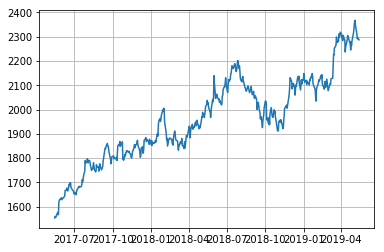

In [5]:
plt.plot(data.index,data['Close Price'])
plt.savefig('the_best_plot.pdf')
plt.autoscale()
plt.grid()
#plt.margins(0.0000001)
plt.show()

In [6]:
data['Day_Perc_Change'] = 100* data['Day_Perc_Change']

# Query 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function. 

Display a stem plot of the daily change in of the stock price in percentage.

This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

/home/abhishek/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'cmap'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


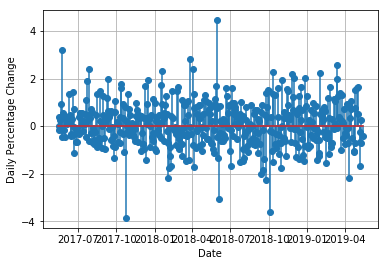

In [7]:
plt.stem(data.index,data['Day_Perc_Change'],cmap = plt.cm.Accent)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Daily Percentage Change')
plt.show()

# Query 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

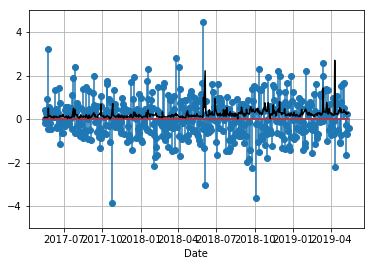

In [8]:
plt.stem(data.index,data['Day_Perc_Change'])
plt.plot(data.index,data['Total Traded Quantity']/10000000,c='black')
plt.ylim(-5,5)
plt.grid()
plt.xlabel('Date')
plt.show()

# Query 2.4

We had created a Trend column in module 1.
We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs.
Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [47]:
data.reset_index(inplace=True)
#data.head()

In [24]:
#data = data.groupby(by='Trend')

In [11]:
a = data.groupby('Trend').size()

In [13]:
print(a)

Trend
Slight or No change    495
dtype: int64


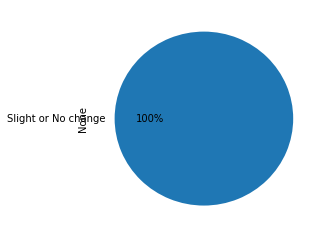

In [16]:
a.plot.pie(figsize=(4,4),autopct="%1.0f%%")
plt.show()

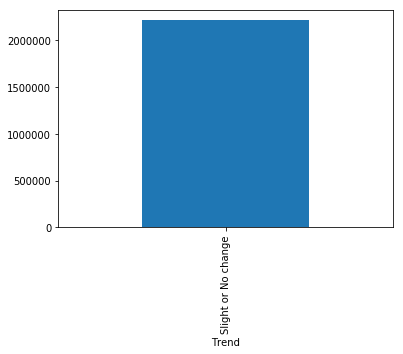

In [20]:
b = data.groupby('Trend')['Total Traded Quantity'].mean()
b.plot.bar()
plt.show()

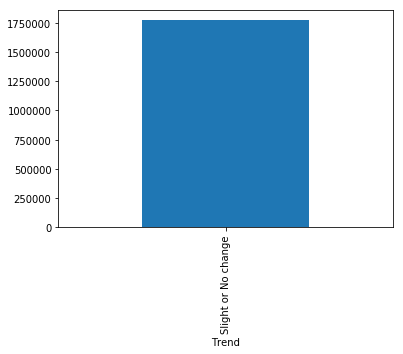

In [38]:
c = data.groupby('Trend')['Total Traded Quantity'].median()
c.plot.bar()
plt.show()

In [19]:
#plt.pie(a[1],labels=a[0],autopct="%1.0f%%")
#plt.show()

In [21]:
#plt.bar(list,data.groupby(by='Trend')['Total Traded Quantity'].mean())

In [25]:
#plt.bar(list,data.groupby(by='Trend')['Total Traded Quantity'].median())

# Query 2.5

Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

In [58]:
#data.info()

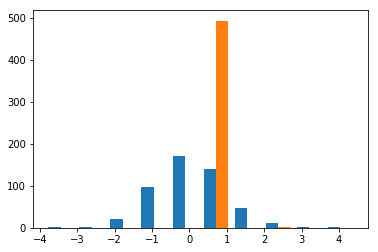

In [59]:
#c = data.groupby('Day_Perc_Change')
d = np.unique(data['Day_Perc_Change'],return_counts=True)
plt.hist(d)
plt.show()

# Query 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.